In [1]:
import numpy as np
import matplotlib.pyplot as plt

def dft_matricial(x):
    """
    DFT usando o método matricial.
    Parâmetros:
    x (array_like): Sinal de entrada de comprimento N.
    Retorna:
    X (numpy.ndarray): Espectro de frequência (complexo).
    """
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))

    W = np.exp(-2j * np.pi * k * n / N)

    X = np.dot(W, x)

    return X



In [2]:
# exemplo (soma de dois senos)
sampling_rate = 1000
duration = 1
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
freq1 = 50
freq2 = 120
sinal = 0.7 * np.sin(2 * np.pi * freq1 * t) + \
        0.3 * np.sin(2 * np.pi * freq2 * t)

In [3]:
sinal_dft = dft_matricial(sinal)

N = len(sinal)
freqs = np.fft.fftfreq(N, d=1/sampling_rate)

magnitude = np.abs(sinal_dft[:N])
freqs_half = freqs[:N]


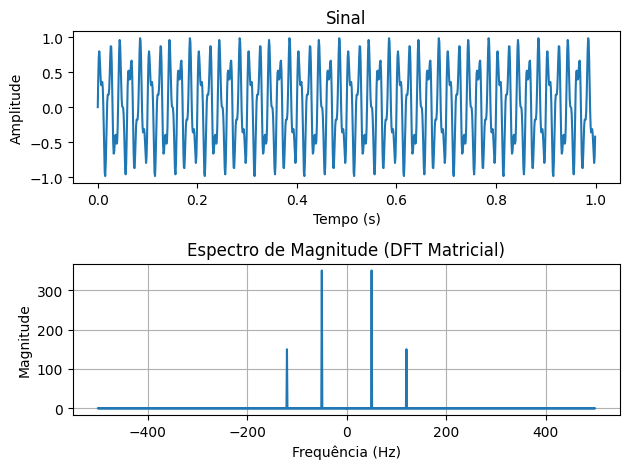

In [4]:
plt.subplot(2, 1, 1)
plt.plot(t, sinal)
plt.title('Sinal')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(freqs_half, magnitude)
plt.title("Espectro de Magnitude (DFT Matricial)")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Magnitude")

plt.grid(True)
plt.tight_layout()
plt.show()

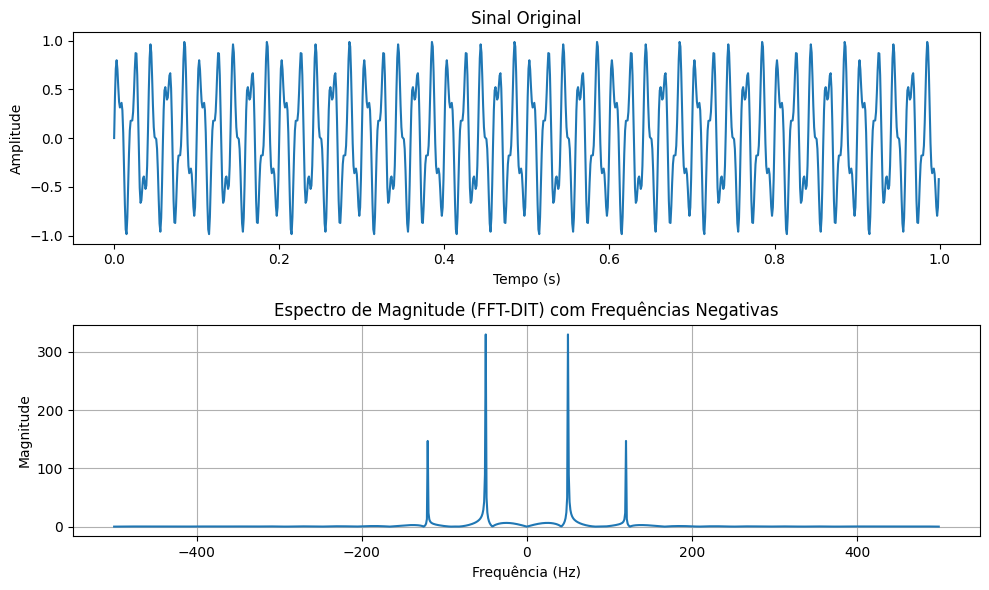

In [14]:
def fft_dit(x):
    """
    FFT por Decimação no Tempo (DIT-FFT).
    Entrada: x (array) - Sinal de entrada de comprimento N (potência de 2).
    Saída: X (array) - Espectro de frequência complexo.
    """
    N = len(x)
    
    # Caso base: DFT de 1 ponto é o próprio sinal
    if N == 1:
        return x
    
    # Verifica se N é potência de 2
    if np.log2(N) % 1 != 0:
        raise ValueError("O comprimento do sinal deve ser uma potência de 2.")
    
    # Separação em partes par e ímpar
    x_even = fft_dit(x[::2])  # Índices pares
    x_odd = fft_dit(x[1::2])  # Índices ímpares
    
    # Combinação usando twiddle factors
    W_N = np.exp(-2j * np.pi * np.arange(N // 2) / N)
    X = np.zeros(N, dtype=np.complex128)
    X[:N//2] = x_even + W_N * x_odd
    X[N//2:] = x_even - W_N * x_odd
    
    return X

# Exemplo de uso
sampling_rate = 1000
duration = 1
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
freq1, freq2 = 50, 120
sinal = 0.7 * np.sin(2 * np.pi * freq1 * t) + 0.3 * np.sin(2 * np.pi * freq2 * t)

# Garante que o comprimento do sinal seja potência de 2
N = 2 ** int(np.ceil(np.log2(len(sinal))))
sinal_padded = np.pad(sinal, (0, N - len(sinal)), mode='constant')

# Calcula a FFT
sinal_fft = fft_dit(sinal_padded)

# Espectro bilateral (incluindo frequências negativas)
magnitude = np.abs(sinal_fft)
freqs = np.fft.fftfreq(N, d=1/sampling_rate)

# Reorganiza o espectro para colocar a frequência zero no centro
magnitude_shifted = np.fft.fftshift(magnitude)
freqs_shifted = np.fft.fftshift(freqs)

# Plot
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t, sinal)
plt.title("Sinal Original")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")

plt.subplot(2, 1, 2)
plt.plot(freqs_shifted, magnitude_shifted)
plt.title("Espectro de Magnitude (FFT-DIT) com Frequências Negativas")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.tight_layout()
plt.show()